# Price Optimization & Sales Forecasting Project

This project focuses on **optimizing product pricing** and **forecasting sales quantities** by analysing historical transaction data, competitor pricing, and seasonal trends. The ultimate goal is to help businesses **maximize profit** while maintaining competitive positioning in the market.

## Business Context
In competitive retail environments, setting the right price can make a significant difference in sales performance and profitability.  
This analysis aims to:
- Understand how different factors — such as **own price**, **competitor prices**, **freight costs**, and **seasonality** — influence sales quantity.
- Identify pricing strategies that balance **volume growth** and **profit margins**.
- Provide a **data-driven framework** to simulate "what-if" pricing scenarios.


In [2]:
import pandas as pd    
import numpy as np

In [3]:
df = pd.read_csv("retail_price.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [5]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,1/5/2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,1/6/2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,1/7/2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,1/8/2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,1/9/2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## Dataset Description

The dataset used in this project contains historical transactional sales data enriched with competitor pricing and logistical cost information.  
Each row represents a single transaction for a specific product, along with details about pricing, category, and timing.

### Key Columns
- **product_category_name** — Name of the product category (e.g., "computers_accessories", "furniture_decor").  
- **unit_price** — Our selling price per unit for the product.  
- **comp_1, comp_2, comp_3** — Prices offered by three different competitors for the same or similar products.  
- **freight_price** — Cost of shipping the product to the customer.  
- **qty** — Quantity of items sold in the transaction.  
- **date** — Transaction date, later used to extract month, year, and quarter for seasonal analysis.  


Additional columns such as revenue, profit, margin and price gaps were engineered to improve model inputs and interpretability.

In [9]:
df['profit'] = (df['unit_price'] - df['freight_price']) * df['qty']
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,profit
0,bed1,bed_bath_table,1/5/2017,1,45.95,15.100000,45.95,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,30.85
1,bed1,bed_bath_table,1/6/2017,3,137.85,12.933333,45.95,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,99.05
2,bed1,bed_bath_table,1/7/2017,6,275.70,14.840000,45.95,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,186.66
3,bed1,bed_bath_table,1/8/2017,4,183.80,14.287500,45.95,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,126.65
4,bed1,bed_bath_table,1/9/2017,2,91.90,15.100000,45.95,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,61.70


In [10]:
df['revenue'] = df['unit_price'] * df['qty']
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,profit,revenue
0,bed1,bed_bath_table,1/5/2017,1,45.95,15.100000,45.95,39,161,2,...,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,30.85,45.95
1,bed1,bed_bath_table,1/6/2017,3,137.85,12.933333,45.95,39,161,2,...,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,99.05,137.85
2,bed1,bed_bath_table,1/7/2017,6,275.70,14.840000,45.95,39,161,2,...,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,186.66,275.70
3,bed1,bed_bath_table,1/8/2017,4,183.80,14.287500,45.95,39,161,2,...,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,126.65,183.80
4,bed1,bed_bath_table,1/9/2017,2,91.90,15.100000,45.95,39,161,2,...,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,61.70,91.90


In [11]:
df['profit_margin'] = df['profit'] / df['revenue'] * 100

In [12]:
df['month_year'] = pd.to_datetime(df['month_year'], dayfirst=True)
df['month_year'].head()

0   2017-05-01
1   2017-06-01
2   2017-07-01
3   2017-08-01
4   2017-09-01
Name: month_year, dtype: datetime64[ns]

In [13]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,profit,revenue,profit_margin
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.95,39,161,2,...,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,30.85,45.95,67.138194
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.95,39,161,2,...,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,99.05,137.85,71.853464
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.95,39,161,2,...,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,186.66,275.70,67.704026
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.95,39,161,2,...,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,126.65,183.80,68.906420
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.95,39,161,2,...,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,61.70,91.90,67.138194


In [14]:
df['price_diff_vs_comp1'] = df['unit_price'] - df['comp_1']
df['price_diff_vs_comp2'] = df['unit_price'] - df['comp_2']
df['price_diff_vs_comp3'] = df['unit_price'] - df['comp_3']

In [15]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_3,ps3,fp3,lag_price,profit,revenue,profit_margin,price_diff_vs_comp1,price_diff_vs_comp2,price_diff_vs_comp3
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.95,39,161,2,...,45.95,4.0,15.100000,45.90,30.85,45.95,67.138194,-43.95,-169.050000,0.0
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.95,39,161,2,...,45.95,4.0,12.933333,45.95,99.05,137.85,71.853464,-43.95,-163.050000,0.0
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.95,39,161,2,...,45.95,4.0,14.840000,45.95,186.66,275.70,67.704026,-43.95,-159.050000,0.0
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.95,39,161,2,...,45.95,4.0,14.287500,45.95,126.65,183.80,68.906420,-43.95,-153.559804,0.0
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.95,39,161,2,...,45.95,4.0,15.100000,45.95,61.70,91.90,67.138194,-43.95,-117.448710,0.0


## Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

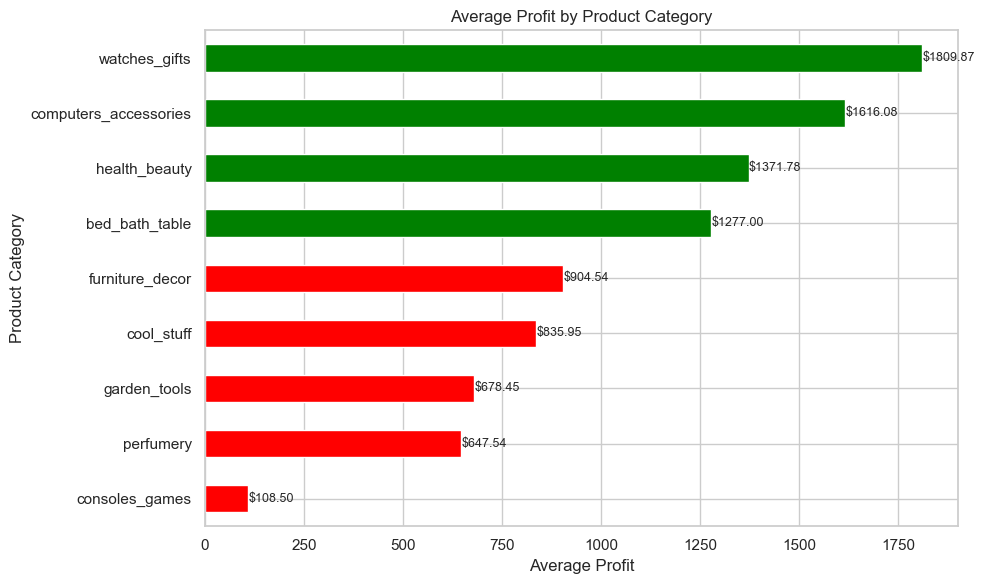

In [18]:
category_profit = df.groupby('product_category_name')['profit'].mean().sort_values()
plt.figure(figsize=(10, 6))

colors = ['red' if val < 1000 else 'green' for val in category_profit]

bars = category_profit.plot(kind='barh', color=colors)
plt.title('Average Profit by Product Category')
plt.xlabel('Average Profit')
plt.ylabel('Product Category')

for index, value in enumerate(category_profit):
    plt.text(value + 1, index, f'${value:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


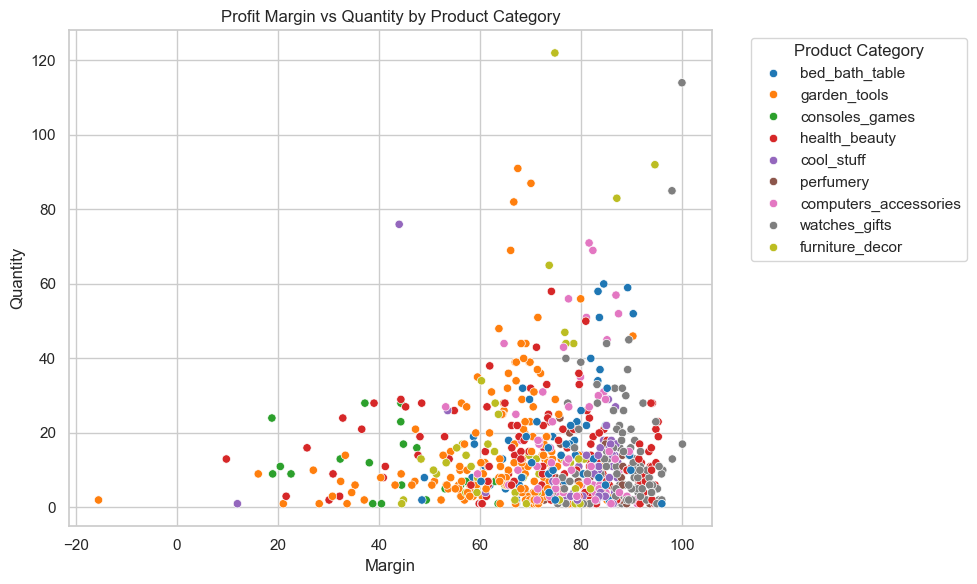

In [19]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='profit_margin',
    y='qty',
    hue='product_category_name',
    palette='tab10'  
)

plt.title('Profit Margin vs Quantity by Product Category')
plt.xlabel('Margin')
plt.ylabel('Quantity')

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

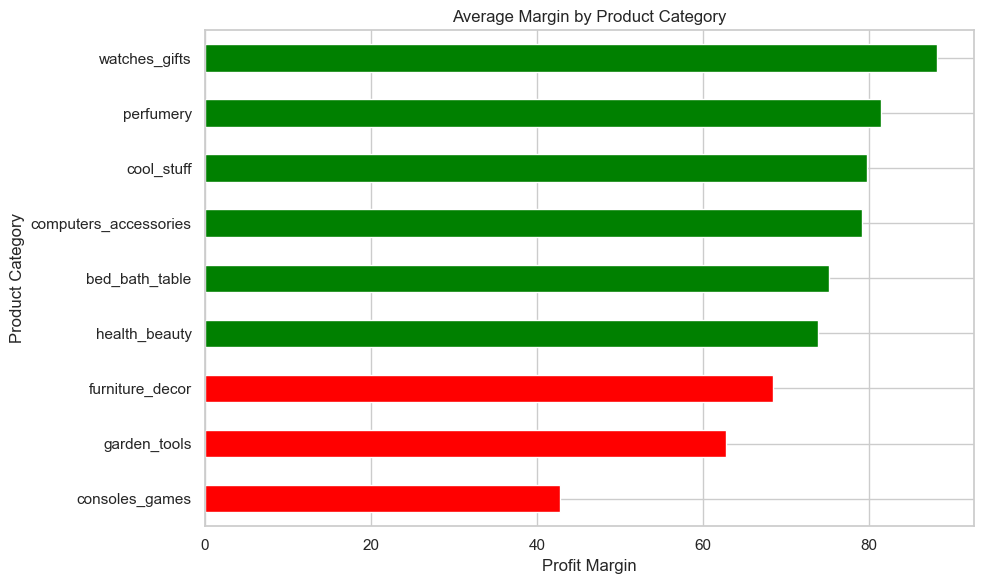

In [20]:
category_margin = df.groupby('product_category_name')['profit_margin'].mean().sort_values()

plt.figure(figsize=(10, 6))

avg_margin = category_margin.mean()
colors = ['red' if val < avg_margin else 'green' for val in category_margin]

bars = category_margin.plot(kind='barh', color=colors)
plt.title('Average Margin by Product Category')
plt.xlabel('Profit Margin')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


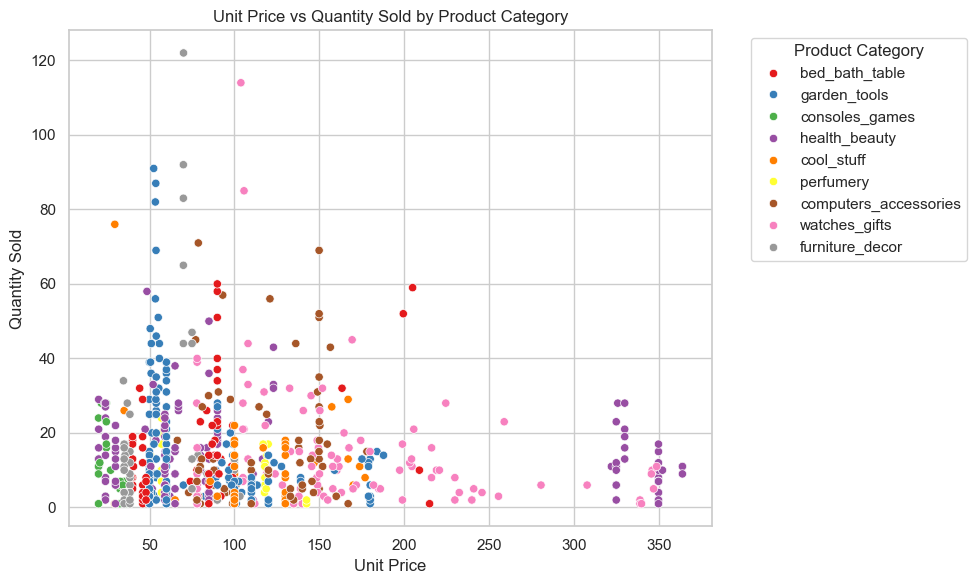

In [21]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='unit_price',
    y='qty',
    hue='product_category_name',
    palette='Set1'  
)

plt.title('Unit Price vs Quantity Sold by Product Category')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A negative correlation was visible in several categories — higher unit prices tended to result in lower quantities sold. 

However, this trend wasn’t universally strong, suggesting that certain product categories may have more price-insensitive demand.

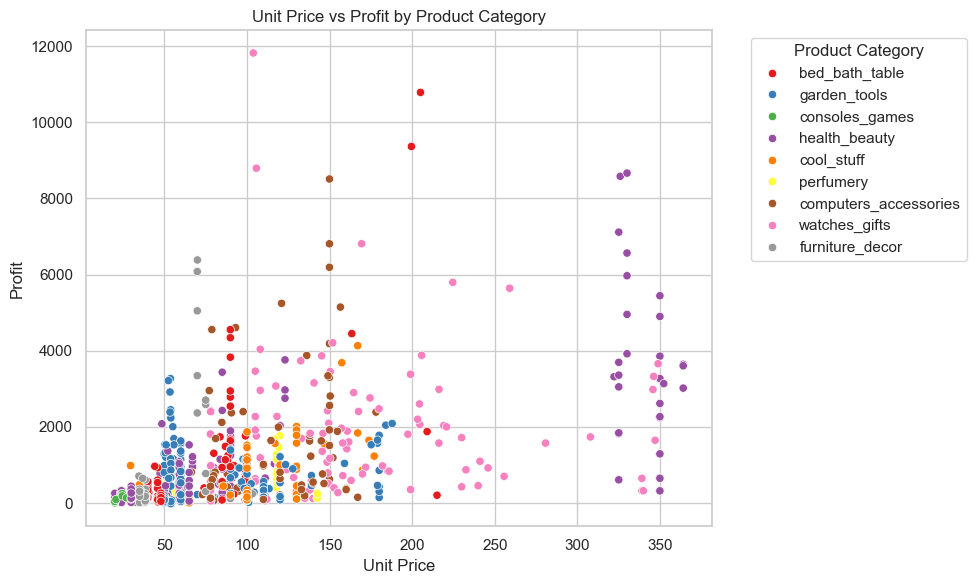

In [23]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='unit_price',
    y='profit',
    hue='product_category_name',
    palette='Set1'  
)

plt.title('Unit Price vs Profit by Product Category')
plt.xlabel('Unit Price')
plt.ylabel('Profit')

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

While higher prices generally contributed to higher profits, the relationship wasn’t linear. This hinted at the need to consider margins alongside sales volume, reinforcing the importance of finding the optimal price point rather than simply maximizing price.

The analysis showed that some categories could sustain higher margins without a major dip in demand, suggesting an opportunity for strategic pricing differentiation.

A few categories consistently operated at margins either well above or below the average. Categories with lower-than-average margins may benefit from revised pricing strategies, while those with higher margins could be sources of competitive advantage.

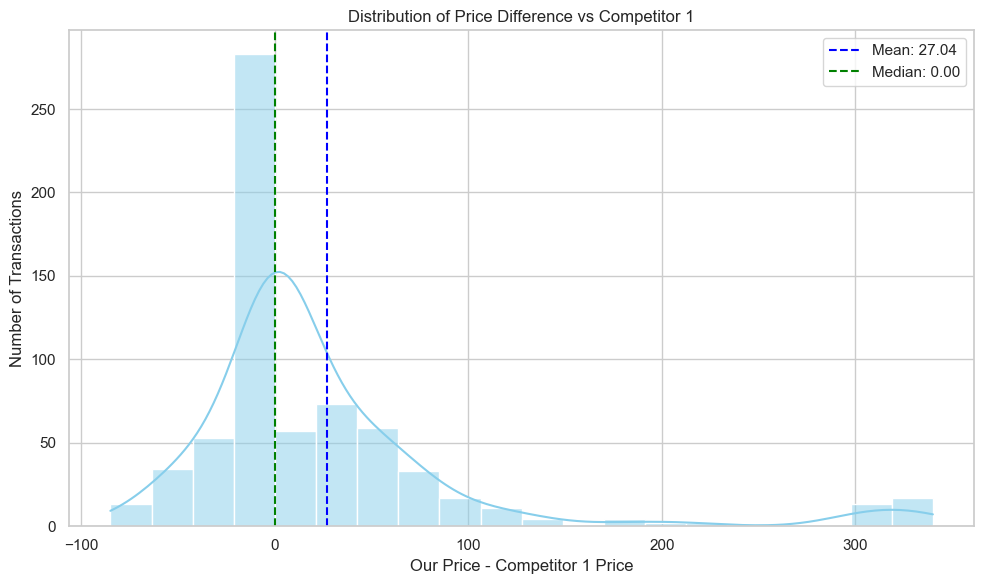

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff_vs_comp1'], bins=20, kde=True, color='skyblue')
mean_diff = df['price_diff_vs_comp1'].mean()
median_diff = df['price_diff_vs_comp1'].median()
plt.axvline(mean_diff, color='blue', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axvline(median_diff, color='green', linestyle='--', label=f'Median: {median_diff:.2f}')
plt.title('Distribution of Price Difference vs Competitor 1')
plt.xlabel('Our Price - Competitor 1 Price')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

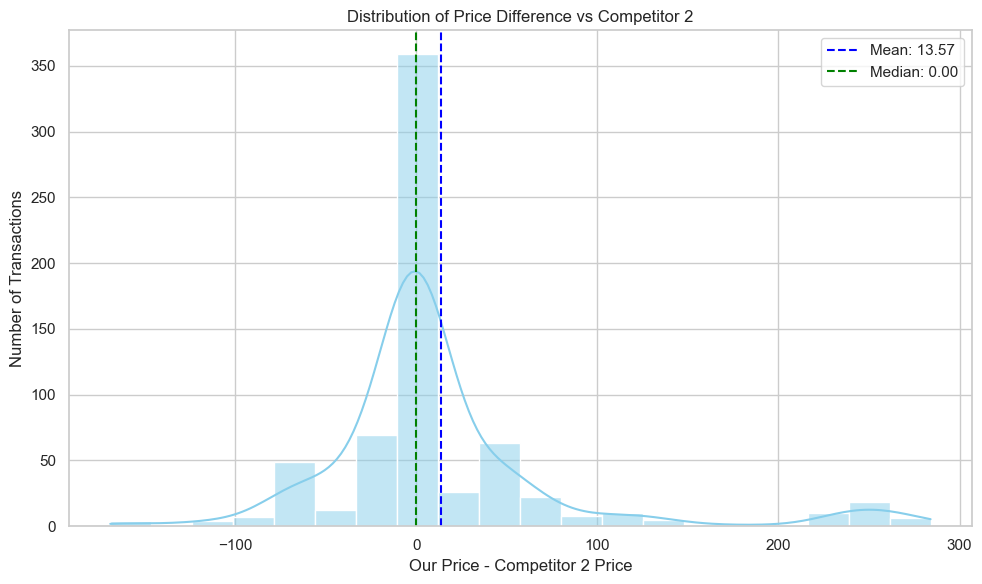

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff_vs_comp2'], bins=20, kde=True, color='skyblue')
mean_diff = df['price_diff_vs_comp2'].mean()
median_diff = df['price_diff_vs_comp2'].median()
plt.axvline(mean_diff, color='blue', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axvline(median_diff, color='green', linestyle='--', label=f'Median: {median_diff:.2f}')
plt.title('Distribution of Price Difference vs Competitor 2')
plt.xlabel('Our Price - Competitor 2 Price')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

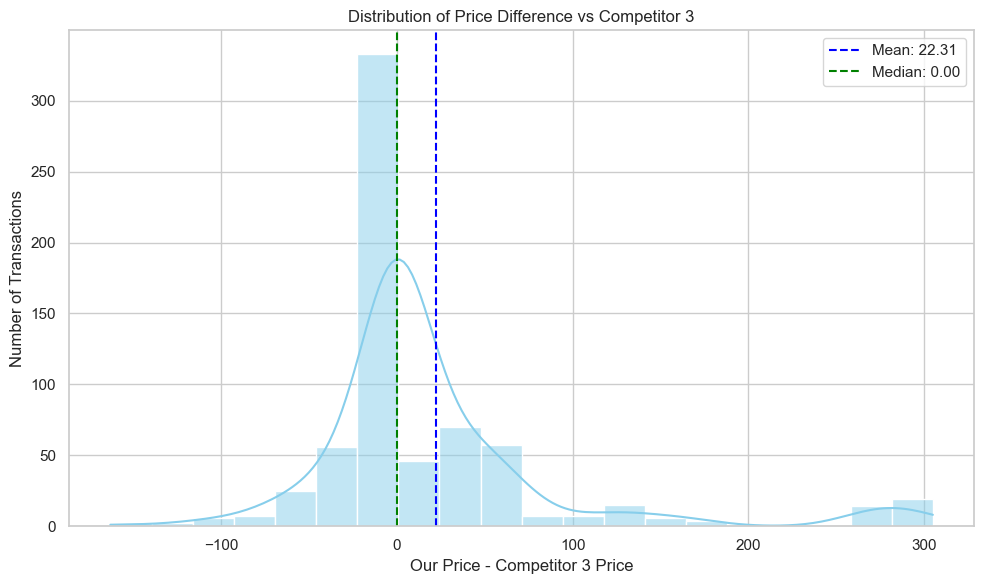

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff_vs_comp3'], bins=20, kde=True, color='skyblue')
mean_diff = df['price_diff_vs_comp3'].mean()
median_diff = df['price_diff_vs_comp3'].median()
plt.axvline(mean_diff, color='blue', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axvline(median_diff, color='green', linestyle='--', label=f'Median: {median_diff:.2f}')
plt.title('Distribution of Price Difference vs Competitor 3')
plt.xlabel('Our Price - Competitor 3 Price')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

Histograms of price differences versus Competitor 1 and Competitor 2 showed distributions centered around slightly negative values, indicating we were often priced a bit lower — though this varied widely. The presence of long tails also suggested that in some transactions, we were significantly under- or overpriced relative to the competition, potentially highlighting areas for revenue optimization.

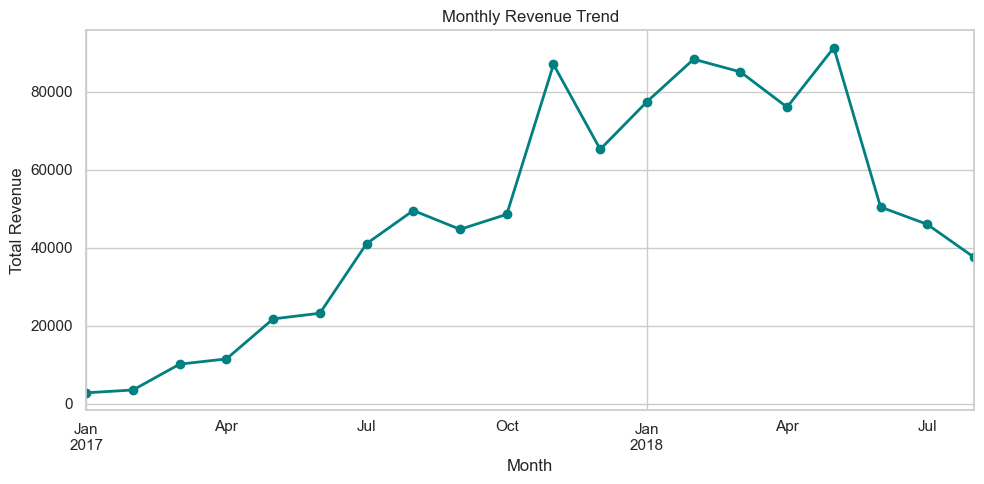

In [31]:
monthly_revenue = df.groupby('month_year')['revenue'].sum()
plt.figure(figsize=(10, 5)) 
monthly_revenue.plot(marker='o', color='teal', linewidth=2) 
plt.title('Monthly Revenue Trend')  
plt.xlabel('Month')  
plt.ylabel('Total Revenue')  
plt.grid(True)  
plt.tight_layout()  
plt.show()  

The monthly revenue trend clearly revealed fluctuations across the calendar year. Certain months stood out with notably higher revenues, suggesting the presence of seasonal peaks, possibly aligned with promotional periods, holidays, or shifts in consumer behavior.

## Model Training:

In this stage, we trained a regression model to predict the quantity of products and profit sold using pricing, competition, logistics, time-based, and category features. The features were preprocessed by combining numerical columns and one-hot encoded product categories. Since the target variable (`qty`) was right-skewed, we applied a log transformation (`log1p`) to normalize it and improve model learning.

We used an **XGBoost Regressor** due to its robustness, ability to handle non linear data and performance on structured/tabular data. The model was initially trained with selected hyperparameters, and later fine-tuned using **Grid Search** for better generalization. The final model was evaluated on the test set using MAE, RMSE, and MAPE to assess performance on the original quantity scale.

Overall, the model effectively captures the relationship between pricing strategies and expected sales quantity, providing a strong foundation for scenario analysis and pricing optimization.



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [36]:
df['month_year'] = pd.to_datetime(df['month_year'], dayfirst=True)
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['quarter'] = df['month_year'].dt.quarter

In [37]:
category_dummies = pd.get_dummies(df['product_category_name'], drop_first=True)

X_numeric = df[['unit_price', 'comp_1', 'comp_2', 'comp_3', 'freight_price', 'month', 'year', 'quarter']]
X = pd.concat([X_numeric, category_dummies], axis=1)
X = X.astype("float64")

df['log_qty'] = np.log1p(df['qty'])
y = df['log_qty']

X_train, X_test, y_train, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

##### Using Grid Search to find the most optimal parameters for XGBoost Regressor

In [39]:
grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), params,
                    cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error')

In [40]:
best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [41]:
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    colsample_bytree= 0.8,
    learning_rate=0.2,
    max_depth=7,
    random_state=42,
    subsample= 1.0
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Model Evaluation

In [43]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_raw)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"\nFinal Model Performance (on original qty scale):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Final Model Performance (on original qty scale):
MAE: 7.96
RMSE: 11.71
MAPE: 134.14%


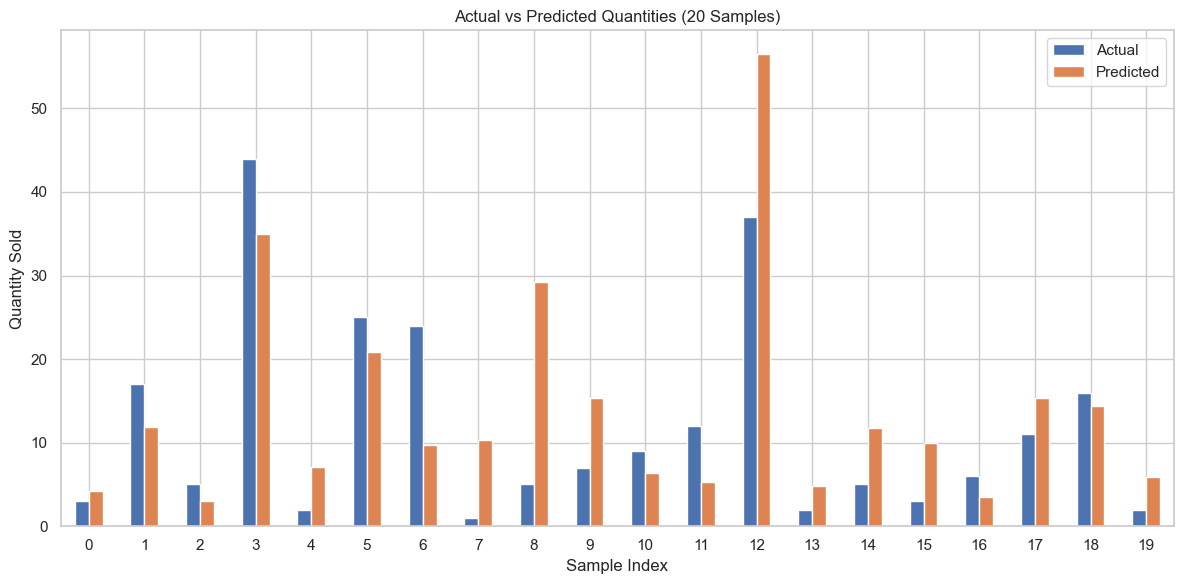

In [44]:
sample = pd.DataFrame({
    'Actual': y_test.values[40:60],
    'Predicted': y_pred[40:60]
}).reset_index(drop=True)

sample.plot(kind='bar', figsize=(12, 6))
plt.title("Actual vs Predicted Quantities (20 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Simulating What-if scenarios for different metrics

In [46]:
def simulate_price_scenario(new_price, unit_cost, comp1, comp2, comp3, freight, category, month=1, year=2023, quarter=None):
    if quarter is None:
        quarter = (month - 1) // 3 + 1

    scenario_input = {
        'unit_price': [new_price],
        'comp_1': [comp1],
        'comp_2': [comp2],
        'comp_3': [comp3],
        'freight_price': [freight],
        'month': [month],
        'year': [year],
        'quarter': [quarter],
    }

    for col in category_dummies.columns:
        scenario_input[col] = [1 if col == category else 0]

    scenario_df = pd.DataFrame(scenario_input).reindex(columns=X.columns, fill_value=0)

    log_qty_pred = model.predict(scenario_df)[0]
    qty_pred = np.expm1(log_qty_pred)

    est_profit = (new_price - unit_cost - freight) * qty_pred

    return round(qty_pred, 2), round(est_profit, 2)


In [47]:
qty, profit = simulate_price_scenario(
    new_price=40,
    unit_cost=25,
    comp1=30,
    comp2=45,
    comp3=55,
    freight=8,
    category='computers_accessories',
    month=4,
    year=2025
)

print(f"Predicted Quantity: {qty}")
print(f"Estimated Profit: ${profit}")


Predicted Quantity: 15.479999542236328
Estimated Profit: $108.35


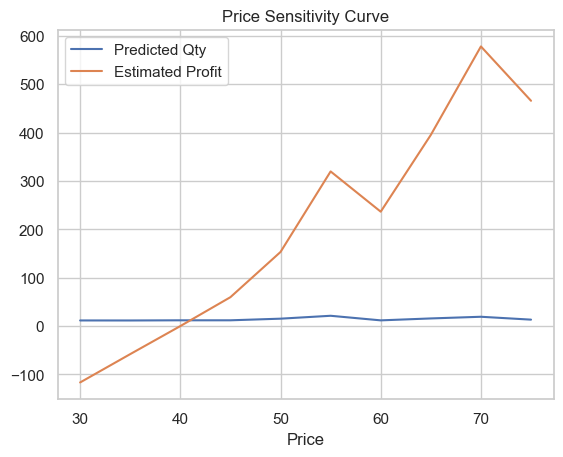

In [48]:
price_range = range(30, 80, 5)
quantities = []
profits = []

for p in price_range:
    qty, profit = simulate_price_scenario(
        new_price=p,
        unit_cost=30,
        comp1=65,
        comp2=45,
        comp3=55,
        freight=10,
        category='computers_accessories',
        month=4,
        year=2025
    )
    quantities.append(qty)
    profits.append(profit)

# Plot
plt.plot(price_range, quantities, label='Predicted Qty')
plt.plot(price_range, profits, label='Estimated Profit')
plt.xlabel("Price")
plt.legend()
plt.title("Price Sensitivity Curve")
plt.show()


The **estimated profit** (orange line) shows a dynamic pattern. Profit increases steadily as the price increases, peaking around the **70–75** mark, before dipping slightly. This indicates that although quantity sold doesn’t change significantly, **raising the price has a strong positive impact on profit** — likely because the margin per unit grows faster than any potential loss in volume.

This finding has important strategic implications:
- The business might consider pricing higher to maximize profit, especially if customer demand doesn’t drop off significantly.
- The “sweet spot” for pricing seems to be between **65 and 75**, where profit reaches its highest levels.
- There’s also a clear loss at lower price points (e.g., at 30), where costs exceed revenue due to thin margins, even if volume remains the same.

In [50]:
import os

In [92]:
df_export = df.copy()
df_export['month_year'] = pd.to_datetime(df_export['month_year'], dayfirst=True)
df_export['price_diff_vs_comp1'] = df_export['unit_price'] - df_export['comp_1']
df_export['price_diff_vs_comp2'] = df_export['unit_price'] - df_export['comp_2']
df_export['price_diff_vs_comp3'] = df_export['unit_price'] - df_export['comp_3']
df_export['profit'] = (df_export['unit_price'] - df_export['freight_price']) * df_export['qty']
df_export['revenue'] = df_export['unit_price'] * df['qty']
df_export['profit_margin'] = df_export['profit'] / df_export['revenue'] * 100


In [94]:
selected_cols = [
    'month_year', 'product_category_name', 'unit_price', 'comp_1', 'comp_2', 'comp_3',
    'price_diff_vs_comp1', 'price_diff_vs_comp2', 'price_diff_vs_comp3',
    'qty', 'freight_price', 'profit', 'revenue', 'profit_margin'
]
df_export[selected_cols].to_csv(r"C:\Users\HP\Downloads\Project\price_optimization.csv", index=False)

## Conclusion & Business Takeaways

This project set out to understand and predict how different pricing and market conditions affect product sales quantity. Using a combination of pricing data, competitor pricing, freight cost, product category, and time-based features, we trained a **regression model—XGBoost**—that performed well in capturing complex relationships within the dataset.

From business perspective, this analysis provides meaningful insights. It confirms that pricing is indeed a major driver of quantity sold, and that competitor prices significantly influence customer purchasing behavior. By accounting for not only our own pricing decisions but also the competitive landscape, the model becomes a valuable tool for forecasting demand more accurately.

One of the most practical outcomes of this project is the ability to simulate different pricing scenarios. With the model in place, we can now ask **“what if”** questions—such as, *What happens if we lower our price next April while competitors remain constant?*—and get a data-driven estimate of both quantity sold and expected profit. This is incredibly useful for revenue management and strategic pricing decisions.

The inclusion of seasonal features like month and quarter also allows the model to adapt to shifts in demand across the year. This means businesses can anticipate slow or peak periods and adjust their strategy accordingly.

